In [27]:
# Set Up Imports
from numpy.lib.type_check import real
from util import *
from physics_pendulum import *
from make_plot import *
from network import RNN

random.seed(231)
# random.seed(420)

learning_rate = 0.001
time_steps = 100
window = 4
epochs = 2000

In [30]:
training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
training_set = [row[1] for row in training_set]

# Clip Into 6 training sets
training_set = [training_set[i] for i in range(0,600,6)]
# training_groups = [[x for x in group] for group in training_set]
# print(len(training_set[0]))
# print(training_set)

In [33]:
# Initialize Network with Nguyen_Widrow weighting
x_network = RNN(window, 3, 1)
x_network.nguyen_widrow()
# Train Network on First Training Set
# training_set = [float((np.sin(x/2))) for x in range(time_steps)] #Sin training set
error = x_network.train(training_set[:time_steps], time_steps, \
        learning_rate=learning_rate, epochs=epochs, window=window)

Epoch 0 	MSE 0.9238921409286301
Epoch 100 	MSE 0.3780890221212408
Epoch 200 	MSE 0.24373093700932041
Epoch 300 	MSE 0.17886324962242825
Epoch 400 	MSE 0.14649435076987144
Epoch 500 	MSE 0.13756863803400446
Epoch 600 	MSE 0.1345519654130491
Epoch 700 	MSE 0.1328643650413166
Epoch 800 	MSE 0.13105670374914266
Epoch 900 	MSE 0.1300373937555171
Epoch 1000 	MSE 0.1305086087651692
Epoch 1100 	MSE 0.13197027660419108
Epoch 1200 	MSE 0.13336526224136808
Epoch 1300 	MSE 0.1383492016718616
Epoch 1400 	MSE 0.13972418401747733
Epoch 1500 	MSE 0.1433798123628522
Epoch 1600 	MSE 0.14782660238711132
Epoch 1700 	MSE 0.15031368254976704
Epoch 1800 	MSE 0.15154519406392108
Epoch 1900 	MSE 0.1488572674335751


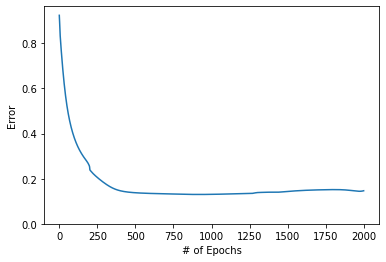

In [38]:
plt.figure(0)
plt.plot(error)
plt.ylabel('Error')
plt.xlabel('# of Epochs')
plt.ylim(0)
plt.show()

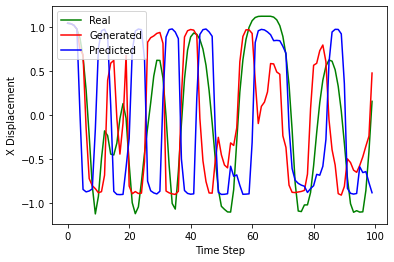

In [41]:
x = training_set[0:4]
x_generated = [*x] #First 4 timesteps come from the original function
x_predicted = [*x]
for time in range(window,time_steps):
    _, y, _ = x_network.feed_forward(training_set[time-window:time])
    _, z, _ = x_network.feed_forward(x)
    # x = z
    x.append(*z)
    x = x[1:]
    x_predicted.append(*z)
    x_generated.append(*y)
# print(x_generated, x_predicted)
plt.figure(1)
plt.plot(training_set[:time_steps], color="g", label="Real")
plt.plot(x_generated, color="r", label="Generated")
plt.plot(x_predicted, color="b", label="Predicted")
plt.xlabel('Time Step')
plt.ylabel('X Displacement')
plt.legend(loc="upper left")
plt.show()

In [43]:
print(x_network.u)
print(np.array(x_network.w))
print(np.array(x_network.v))

[-1.958908810783885, 0.5369453297625371, -0.7384771310316784]
[[ 1.02755011]
 [ 2.37835115]
 [ 3.01175901]
 [-2.6524648 ]]
[[-0.78749344 -1.46604505  1.03864136]
 [-0.83452858 -0.73161317  1.85567316]
 [-0.76340662  0.59721852  0.98466119]
 [ 0.67924431  1.58622223 -0.42991788]
 [ 0.87515658  1.50067112 -2.55092208]]


In [45]:
print(np.clip(x_network.h, -1, 1))

[-0.8420571  -0.86255285 -0.29426747]


<Figure size 432x288 with 0 Axes>

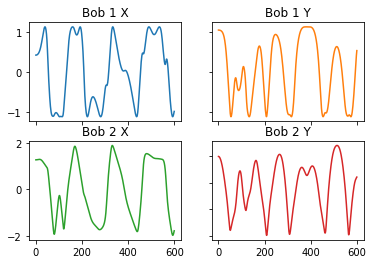

In [53]:
data = training_set = read_csv_for_network('./dataset/physics_model/0_cropped.csv')[:600]
x_1 = [row[0] for row in data]
x_2 = [row[2] for row in data]
y_1 = [row[1] for row in data]
y_2 = [row[3] for row in data]

plt.figure(2)
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x_1)
axs[0, 0].set_title('Bob 1 X')
axs[0, 1].plot(y_1, 'tab:orange')
axs[0, 1].set_title('Bob 1 Y')
axs[1, 0].plot(x_2, 'tab:green')
axs[1, 0].set_title('Bob 2 X')
axs[1, 1].plot(y_2, 'tab:red')
axs[1, 1].set_title('Bob 2 Y')
for ax in fig.get_axes():
    ax.label_outer()
plt.show()